# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here.
import pandas as pd
import numpy as np 

student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30],'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data


,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

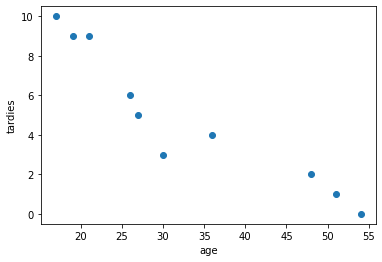

In [3]:
# Your code here.
import matplotlib.pyplot as plt
import scipy.stats as st

plt.scatter(student_data['X'],student_data['Y'])
plt.xlabel('age')
plt.ylabel('tardies')
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 

#tardiness seems to be negatively correlated with age.
#the older the age, generally the less tardies. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:


print(np.corrcoef(student_data['X'],student_data['Y']))

#covariance:
print()
print(np.cov(student_data['X'],student_data['Y']))

#correlation of -0.93 suggests a very strong inverse relationship between age and tardiness

[[ 1.         -0.93916269]
 [-0.93916269  1.        ]]

[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

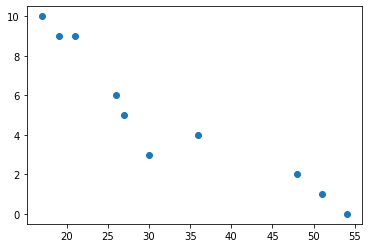

12.888803363135768
[-0.24282077]


In [6]:
# Your response here.

from sklearn import linear_model

#age is the independent variable (what we think will help us predict tardinesss)
x = student_data[['X']]

#tardiness is the dependent variable (what we want to predict)

y = student_data['Y']

plt.scatter(x,y)
plt.show()

#creating model (choosing linear because of the correlation value - 0.93, which suggests linear relationship)
model = linear_model.LinearRegression()

#going to fit/train the model on our data.

result = model.fit(x,y)
print(result.intercept_)
print(result.coef_)

#under this model, students with an age of 0 have baseline of 12.88 tardies
#each additional year in age, improves tardies by -0.24

Plot your regression model on your scatter plot.

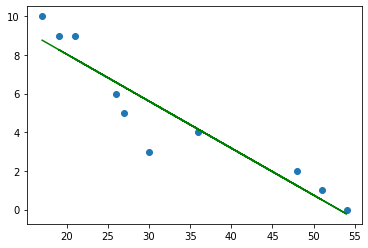

In [7]:
# Your code here.
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x,regression_line,c='green')

plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# Your response here. 

from sklearn.metrics import mean_squared_error

display(mean_squared_error(result.predict(x),y))
result.score(x,y)

#so this model has a mean squared error of 1.33 and an r^2 of 0,88
#which means that it has over 88% of the error captured
#I would say it is a decent predictor of tardiness.


1.3319201847356268

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('./vehicles.csv')
vehicles.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Your response here. 
# the best variables are those that have a high correlation with the target (you want to predict, always the y), but low correlation between themselves

#correlation matrix for dataframe
print(vehicles.corr())

# fuel barrels/year will be the most important (highest correlation value), while year will be the least useful
#(lowest correlation value)



                             Year  Engine Displacement  Cylinders  \
Year                     1.000000             0.037876   0.082469   
Engine Displacement      0.037876             1.000000   0.901858   
Cylinders                0.082469             0.901858   1.000000   
Fuel Barrels/Year       -0.221084             0.789752   0.739517   
City MPG                 0.161818            -0.740317  -0.703866   
Highway MPG              0.267259            -0.715039  -0.650287   
Combined MPG             0.204751            -0.746782  -0.698648   
CO2 Emission Grams/Mile -0.222300             0.803520   0.752393   
Fuel Cost/Year          -0.091913             0.769678   0.778153   

                         Fuel Barrels/Year  City MPG  Highway MPG  \
Year                             -0.221084  0.161818     0.267259   
Engine Displacement               0.789752 -0.740317    -0.715039   
Cylinders                         0.739517 -0.703866    -0.650287   
Fuel Barrels/Year                

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Your response here. 
#multilinear regression
x = vehicles[['Fuel Barrels/Year','Year', 'Cylinders', 'Combined MPG','Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

model = linear_model.LinearRegression()
result = model.fit(x,y)

result.score(x,y)

regression_line = result.intercept_ + result.coef_[0]*x
#pretty good r^2

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [31]:
x_values = sm.add_constant(vehicles[['Fuel Barrels/Year','Year', 'Cylinders', 'Combined MPG','Fuel Cost/Year']]) # We must add the intercept using the add_constant function
y_values = vehicles['CO2 Emission Grams/Mile']

train = sm.OLS(y_values, x_values).fit()
model_predictions = train.predict(X) ## give us the points to droaw the regression line  

print_model = train.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                             20:23:10   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
#OLS model is capturaing 98.1% of error, so good r^2 score
#fuel barrels/year is the best indicator of prediction for CO2 Emission Grams/Mile

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [33]:
# Your code here.

parties = pd.DataFrame({'x':[1,3,4,6,8,9,11,14],'y':[1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [48]:
# Your code here.

from sklearn.linear_model import LinearRegression

model = linear_model.LinearRegression()

x = parties[['x']]
y=parties['y']
result = model.fit(x,y)

regression_line = result.intercept_ + (result.coef_[0]*x)

<function matplotlib.pyplot.show(close=None, block=None)>

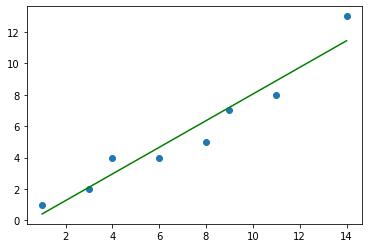

In [51]:
plt.scatter(parties['x'],parties['y'])
plt.plot(x,regression_line,color='green')
plt.show

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [58]:
from sklearn.metrics import mean_squared_error

print('mse: ',mean_squared_error(y,model.predict(x)))
print('r**2: ',model.score(x,y))
print('mse: ',np.sqrt(mean_squared_error(y,model.predict(x))))

#from the regression line can see they are positively correlated, more people invited, more who show up
#MSE of 87, meaning on average able to predict how many people show up within 1 person of the mean.
#meaning on average and r squared of 0.93, which means 93% of error captured by the model.


mse:  0.8712121212121214
r**2:  0.9316696375519905
mse:  0.9333874443188752


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

mse:  0.3050483351235232
r**2:  0.9433811802232854
mse:  0.5523118096904349


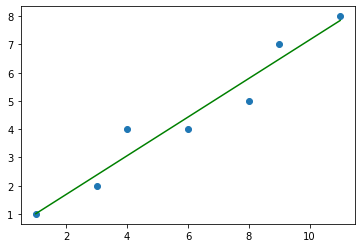

In [60]:
# Your response here. 
parties = pd.DataFrame({'x':[1,3,4,6,8,9,11],'y':[1,2,4,4,5,7,8]})
x = parties[['x']]
y=parties['y']
result = model.fit(x,y)
regression_line = result.intercept_ + (result.coef_[0]*x)

plt.scatter(parties['x'],parties['y'])
plt.plot(x,regression_line,color='green')
plt.show

print('mse: ',mean_squared_error(y,model.predict(x)))
print('r**2: ',model.score(x,y))
print('mse: ',np.sqrt(mean_squared_error(y,model.predict(x))))


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

#without the problematic point, our error reduces dramatically